In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
import warnings
warnings.filterwarnings('ignore')


##### (El EDA mas exahustivo esta en mi anterior trabajo, ya que es una continuación de eso)

In [ ]:
# Cargamos la base de datos, traida de mi anterior proyecto el EDA

df = pd.read_csv("../data/df_top5.csv")
df

,Country,League,home_team,away_team,home_score,away_score,season_year,first_half,second_half,home_team_goals_current_time,...,minuto_gol_home,minuto_gol_away,equipo_marco_primero,equipo_ganador,anoto_primero_y_gano,save_ratio_home,save_ratio_away,equipo_mas_faltas,mas_faltas_perdio,gana_quien_mas_amarillas
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4,1,2024/2025,3 - 0,1 - 1,"[""11'"", ""12'"", ""45'"", ""66'""]",...,11.0,75.0,home,home,1,0.800000,0.500000,home,0,False
1,Germany,Bundesliga,Freiburg,Mainz,0,0,2024/2025,0 - 0,0 - 0,NaN,...,NaN,NaN,ninguno,draw,0,1.000000,1.000000,away,1,False
2,Germany,Bundesliga,Dortmund,RB Leipzig,2,1,2024/2025,1 - 1,1 - 0,"[""30'"", ""65'""]",...,30.0,27.0,away,home,0,0.666667,0.714286,away,1,False
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3,0,2024/2025,2 - 0,1 - 0,"[""15'"", ""43'"", ""51'""]",...,15.0,NaN,home,home,1,1.000000,0.571429,away,1,False
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7,2,2024/2025,4 - 1,3 - 1,"[""9'"", ""18'"", ""20'"", ""32'"", ""61'"", ""66'"", ""69'""]",...,9.0,35.0,home,home,1,0.750000,0.222222,away,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34980,Spain,Laliga,Valladolid,Rayo Vallecano,1,3,2000/2001,1 - 1,0 - 2,NaN,...,NaN,NaN,ninguno,away,0,NaN,NaN,empate,0,False
34981,Spain,Laliga,Dep. La Coruna,Villarreal,4,2,2000/2001,2 - 0,2 - 2,NaN,...,NaN,NaN,ninguno,home,0,NaN,NaN,empate,0,False
34982,Spain,Laliga,Malaga,Celta Vigo,1,4,2000/2001,1 - 2,0 - 2,NaN,...,NaN,NaN,ninguno,away,0,NaN,NaN,empate,0,False
34983,Spain,Laliga,Real Madrid,Numancia,1,0,2000/2001,1 - 0,0 - 0,NaN,...,NaN,NaN,ninguno,home,0,NaN,NaN,empate,0,False


In [ ]:
# --- Estadísticas generales del dataset ---

print("Tamaño del dataset:", df.shape)
print()
print("\nInformación general:")
print()
df.info()
print()


Tamaño del dataset: (34985, 60)


Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34985 entries, 0 to 34984
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               34985 non-null  object 
 1   League                                34985 non-null  object 
 2   home_team                             34985 non-null  object 
 3   away_team                             34985 non-null  object 
 4   home_score                            34985 non-null  int64  
 5   away_score                            34985 non-null  int64  
 6   season_year                           34985 non-null  object 
 7   first_half                            34853 non-null  object 
 8   second_half                           34875 non-null  object 
 9   home_team_goals_current_time          15234 non-null  object 
 10  home_team_goals           

In [ ]:
# --- Vemos cuantos nulos hay por columnas ---

print("\nNulos por columna:")
print()
print(df.isna().sum())


Nulos por columna:

Country                                     0
League                                      0
home_team                                   0
away_team                                   0
home_score                                  0
away_score                                  0
season_year                                 0
first_half                                132
second_half                               110
home_team_goals_current_time            19751
home_team_goals                         21856
home_team_goals_assist                  21856
away_team_goals_current_time            21896
away_team_goals                         23477
away_team_goals_assist                  23477
home_team_yellow_card_why               23907
away_team_yellow_card_why               23368
home_team_red_card_why                  33910
away_team_red_card_why                  33730
home_team_substitutions_current_time    19893
home_team_substitutions                 19894
home_team_sub

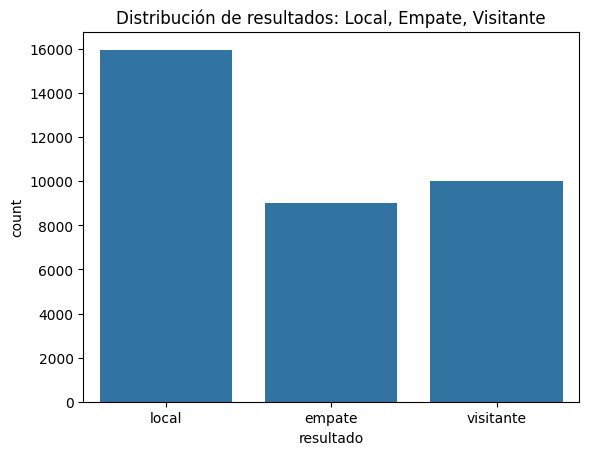

In [19]:
# --- Distribución de resultados ---


sns.countplot(data=df, x='resultado')
plt.title("Distribución de resultados: Local, Empate, Visitante")
plt.show()

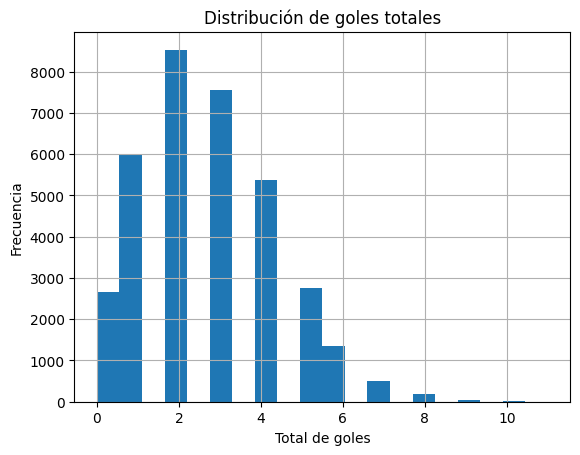

In [ ]:
# --- Histograma de total de goles ---

df['total_goles'].hist(bins=20)
plt.title("Distribución de goles totales")
plt.xlabel("Total de goles")
plt.ylabel("Frecuencia")
plt.show()

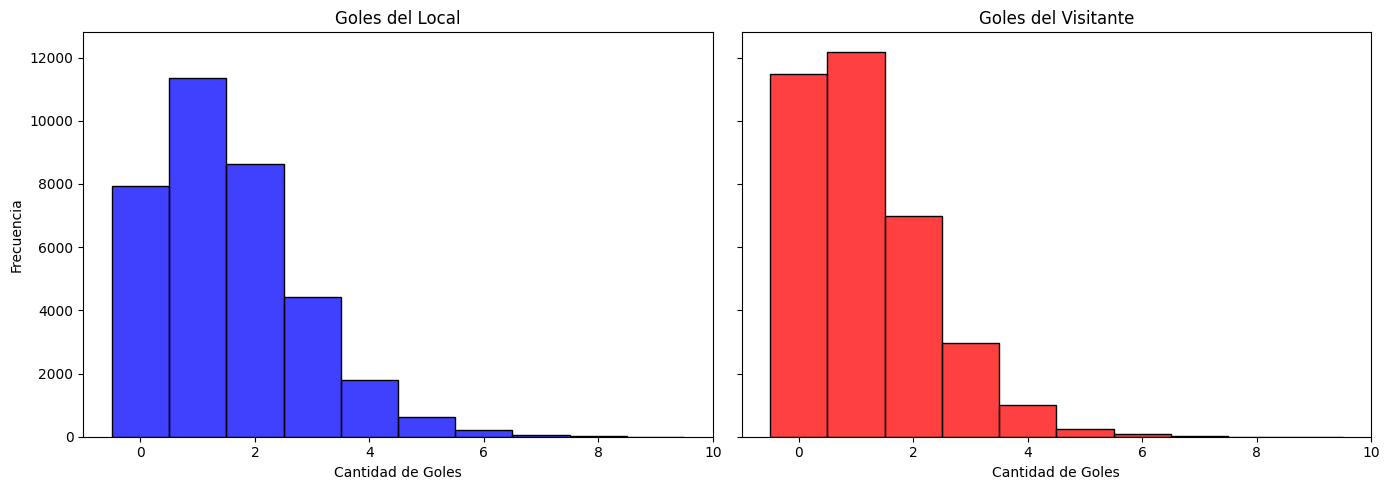

In [ ]:
# --- Goles divididos por localia ---

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(df['home_score'], bins=range(0, 9), kde=False, color='blue', ax=axes[0], discrete=True)
axes[0].set_title('Goles del Local')
axes[0].set_xlabel('Cantidad de Goles')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['away_score'], bins=range(0, 9), kde=False, color='red', ax=axes[1], discrete=True)
axes[1].set_title('Goles del Visitante')
axes[1].set_xlabel('Cantidad de Goles')

plt.tight_layout()
plt.show()

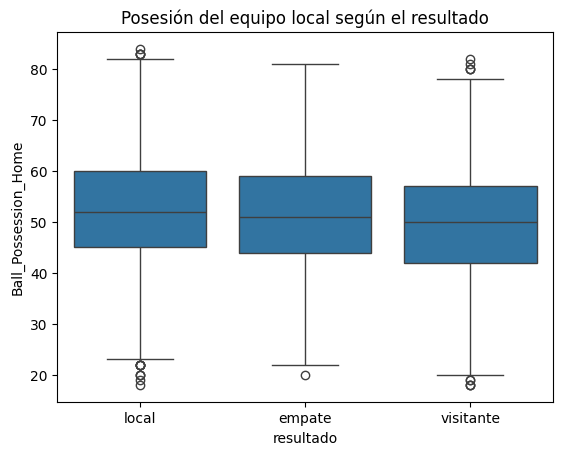

In [20]:
# --- Posesión vs Resultado ---
sns.boxplot(data=df, x='resultado', y='Ball_Possession_Home')
plt.title("Posesión del equipo local según el resultado")
plt.show()

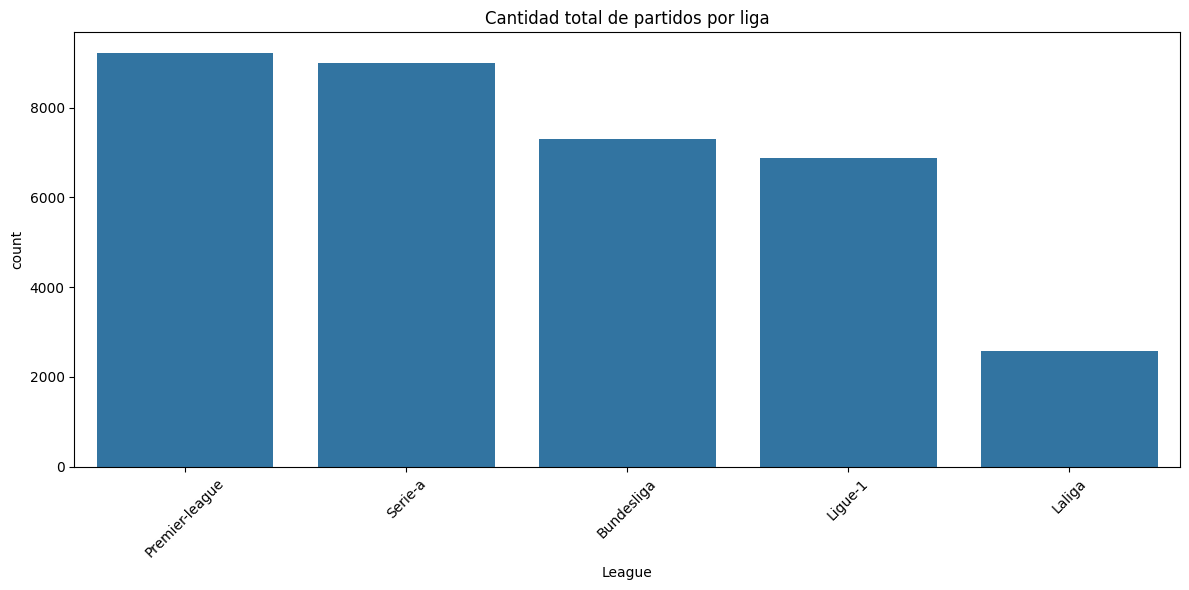

In [5]:
# --- Visualizaciones globales por liga y temporada ---
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='League', order=df['League'].value_counts().index)
plt.title('Cantidad total de partidos por liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

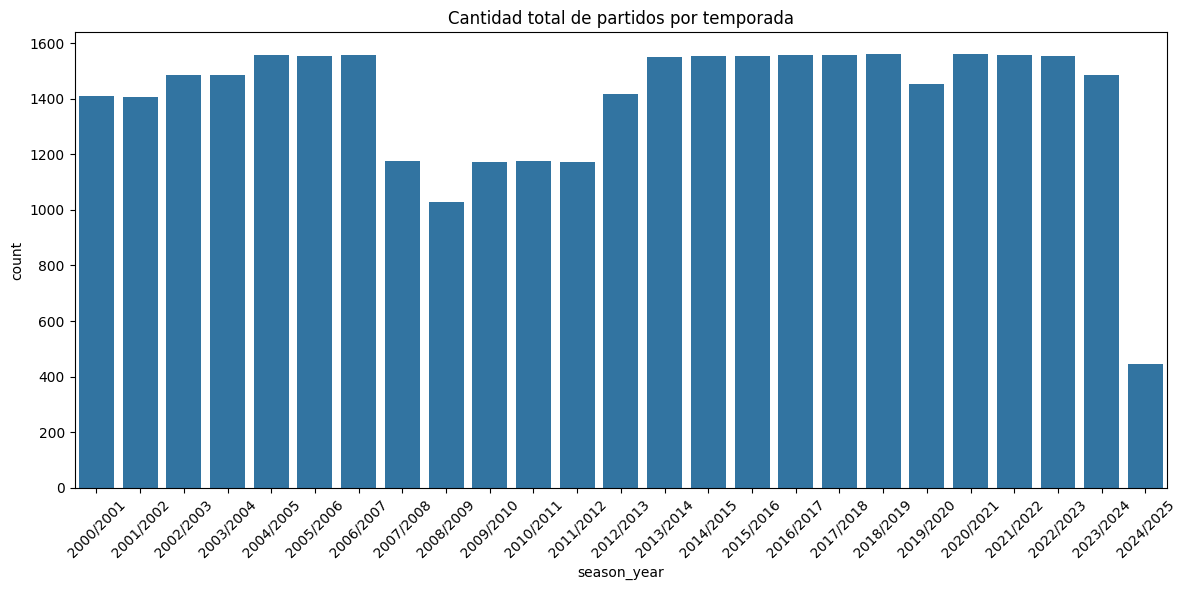

In [ ]:
# --- Cantidad de partidos por temporadas ---
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='season_year', order=sorted(df['season_year'].unique()))
plt.title('Cantidad total de partidos por temporada')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

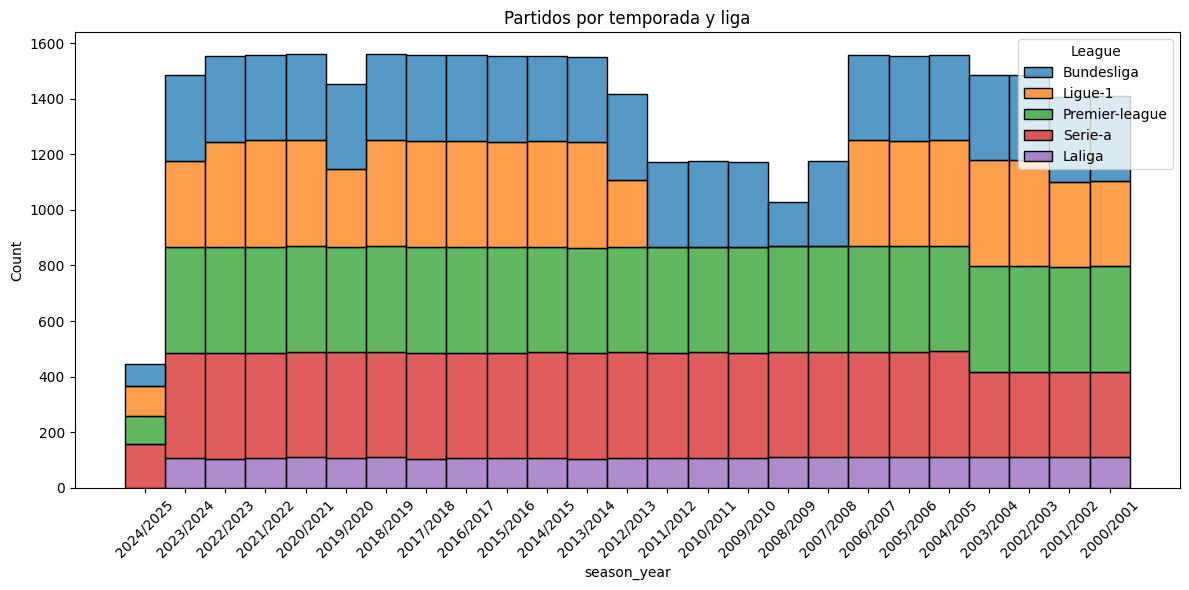

In [ ]:
# --- Distribución de partidos en funcion de ligas ---

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='season_year', hue='League', multiple='stack')
plt.title('Partidos por temporada y liga')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

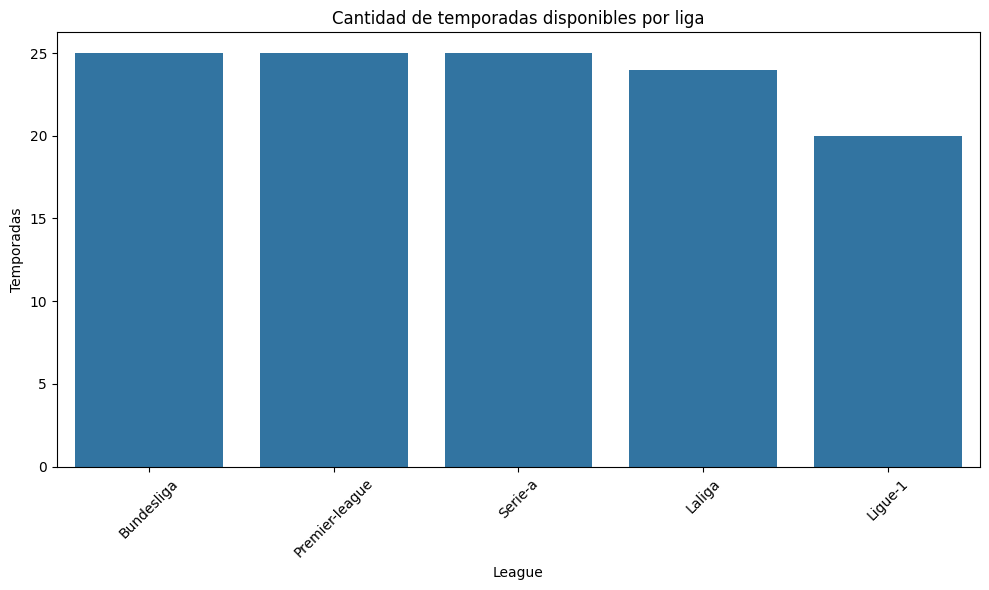

In [ ]:
# --- Análisis de cobertura de datos por liga ---

plt.figure(figsize=(10, 6))
ligas_temporadas = df.groupby('League')['season_year'].nunique().sort_values(ascending=False)
sns.barplot(x=ligas_temporadas.index, y=ligas_temporadas.values)
plt.title('Cantidad de temporadas disponibles por liga')
plt.xticks(rotation=45)
plt.ylabel('Temporadas')
plt.tight_layout()
plt.show()

In [ ]:
# --- Filtramos solo Premier League ---

df_premier = df[df['League'] == 'Premier-league'].copy()

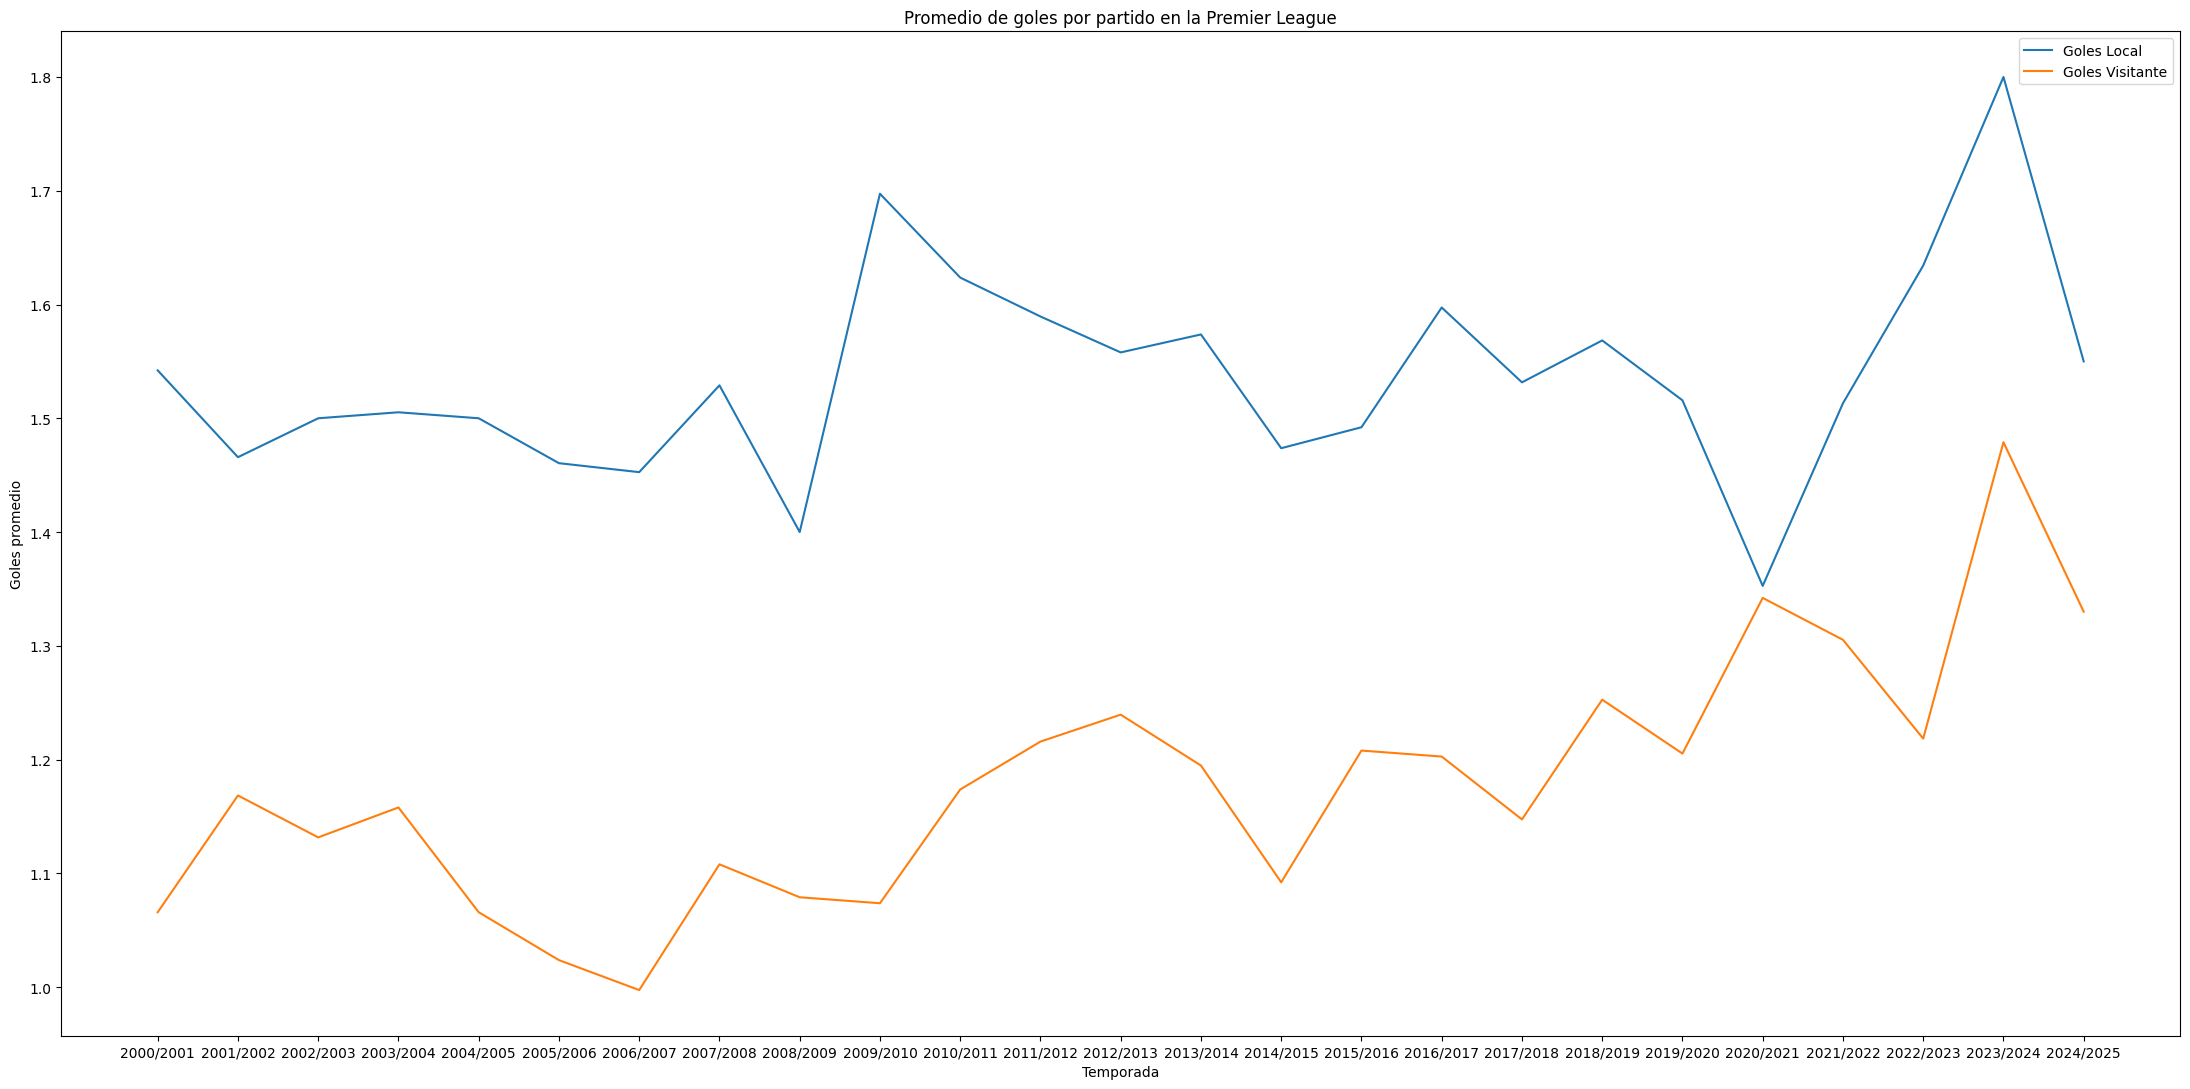

In [11]:
# Estadísticas clave de la Premier por temporada

# Calculamos los promedios por temporada
goles_por_temporada = df_premier.groupby('season_year')[['home_score', 'away_score']].mean().reset_index()

# Graficamos correctamente
plt.figure(figsize=(22, 11))
sns.lineplot(data=goles_por_temporada, x='season_year', y='home_score', label='Goles Local')
sns.lineplot(data=goles_por_temporada, x='season_year', y='away_score', label='Goles Visitante')
plt.title('Promedio de goles por partido en la Premier League')
plt.xlabel('Temporada')
plt.ylabel('Goles promedio')
plt.legend()
plt.tight_layout()
plt.show()


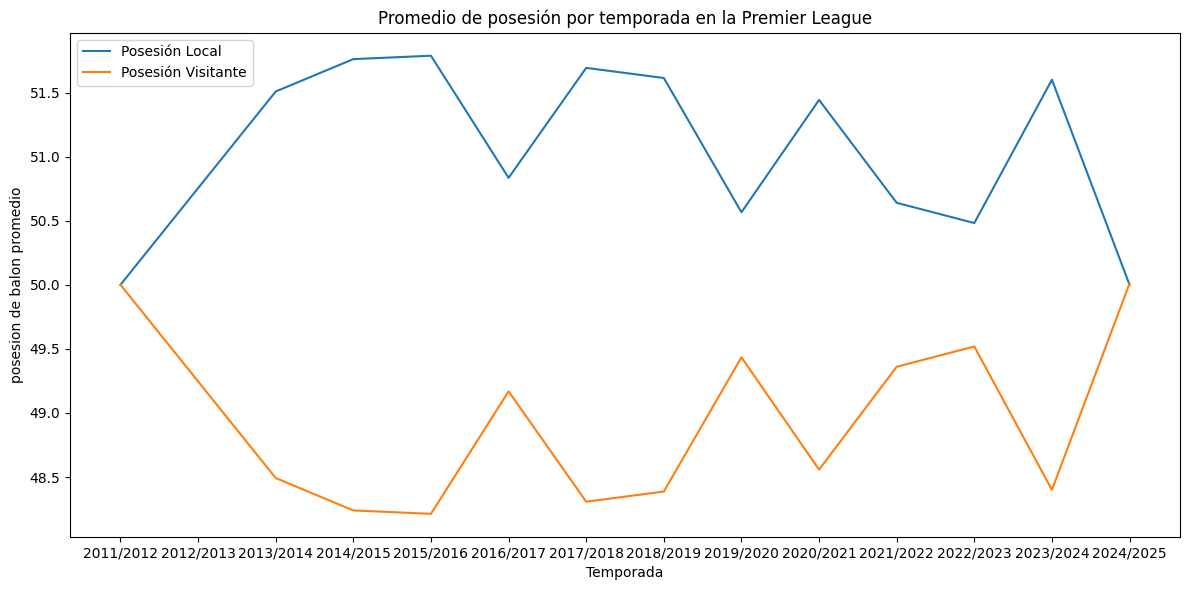

In [ ]:
# Calculamos los promedios por temporada (Revisar Hegoi)

posesion_por_temporada = df_premier.groupby('season_year')[['Ball_Possession_Home', 'Ball_Possession_Away']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=posesion_por_temporada, x='season_year', y='Ball_Possession_Home', label='Posesión Local' )
sns.lineplot(data=posesion_por_temporada, x='season_year', y='Ball_Possession_Away', label='Posesión Visitante')
plt.title('Promedio de posesión por temporada en la Premier League')
plt.xlabel('Temporada')
plt.ylabel('posesion de balon promedio')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Filtramos la temporada 2023/2024 completa (para ver que este completa porque es la que vamos a analizar)

temporadas_ordenadas = sorted(df_premier['season_year'].unique())
temporada_2324 = temporadas_ordenadas[-2]

df_premier_2324 = df_premier[df_premier['season_year'] == temporada_2324].copy()
print(f"Partidos en la temporada 2023/2024: {df_premier_2324.shape[0]}")


Partidos en la temporada 2023/2024: 380
